In [9]:
import tensorflow as tf

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import pathlib
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)

In [12]:
data_dir = pathlib.Path(data_dir)
print(data_dir)

C:\Users\laure\.keras\datasets\flower_photos


In [13]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3666

In [14]:
CLASS_NAMES = [item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]
print(CLASS_NAMES)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [15]:
import random
from basicCNN import *

IMG_SIZE = 50
training_data , testing_data,  distribution = create_training_data(data_dir, IMG_SIZE, CLASS_NAMES)
random.shuffle(training_data)


In [16]:
print(len(training_data))
i = 0
for elem in distribution:
    print('Proportion of ' + str(CLASS_NAMES[i]))
    print(elem / image_count)
    i+=1

2749
Proportion of daisy
0.1723949809056192
Proportion of dandelion
0.24440807419530824
Proportion of roses
0.1745771958537916
Proportion of sunflowers
0.190671031096563
Proportion of tulips
0.21794871794871795


This image


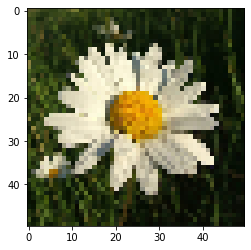

is represented like this to our code 
 
[[[46 85 86]
  [41 88 88]
  [41 85 76]
  ...
  [ 7 25 12]
  [ 4 17  9]
  [ 6 22 11]]

 [[33 85 75]
  [30 77 65]
  [24 63 48]
  ...
  [ 6 22 12]
  [ 7 18  9]
  [ 5 19  9]]

 [[27 66 55]
  [25 70 53]
  [13 40 26]
  ...
  [ 7 22 13]
  [ 5 22  9]
  [ 5 18  7]]

 ...

 [[17 51 36]
  [12 40 30]
  [23 67 63]
  ...
  [10 31 20]
  [ 9 20 12]
  [ 4 13  8]]

 [[29 82 65]
  [ 4 21  9]
  [ 8 31 18]
  ...
  [ 6 18 12]
  [ 8 16 13]
  [ 6 14 13]]

 [[14 41 26]
  [ 6 28 15]
  [13 50 34]
  ...
  [ 4 14  8]
  [ 4 11  8]
  [ 4 11  8]]]


In [17]:
#split into data point and label (X,y)
X , y = restructure_data(training_data)

#take a look at a piece of data
print('This image')

check_image = training_data[0][0]
#try commenting out the line below
#how does it affect the image? how does it affect the training?
check_image = cv2.cvtColor(check_image, cv2.COLOR_BGR2RGB)
plt.imshow(check_image)
plt.show()

print('is represented like this to our code \n ')

print(training_data[0][0])
#print(testing_data[0][0])

In [18]:
X = X/255.0

#magical model building!
model = build_model(X,y,len(CLASS_NAMES))

#note: 
#epochs = number of times it trains
#validation_split = what to take out to test on automatically
model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 1924 samples, validate on 825 samples
Epoch 1/3
1924/1924 [==============================] - 42s 22ms/sample - loss: 1.4758 - acc: 0.3883 - val_loss: 1.2203 - val_acc: 0.5030
Epoch 2/3
1924/1924 [==============================] - 42s 22ms/sample - loss: 1.1265 - acc: 0.5437 - val_loss: 1.0799 - val_acc: 0.5891
Epoch 3/3
1924/1924 [==============================] - 48s 25ms/sample - loss: 1.0049 - acc: 0.6065 - val_loss: 1.1396 - val_acc: 0.5515


In [19]:
X_test, y_test = restructure_data(testing_data)
predictions = model.predict(X_test)

error_occurances = []
i = 0

while i < len(predictions):
    
    if not np.argmax(predictions[i]) == y_test[i]:
        error_occurances.append(i)
        
    i+=1
    
print('The model was right ' + str(100*(1-len(error_occurances)/len(predictions))) + '% of the time')
    

The model was right 51.79934569247546% of the time


In [20]:
import random
#check a random data point from all of X_test
#check = random.randint(0,len(X_test)-1) 
#or check one of the mrked errors
check = error_occurances[random.randint(0, len(error_occurances)-1)]

print('The model predicted that this image is in the category of ' + DATA_CLASSES[np.argmax(predictions[check])])
fix_colors = cv2.cvtColor(X_test[check], cv2.COLOR_BGR2RGB)
plt.imshow(fix_colors)
plt.show()

NameError: name 'DATA_CLASSES' is not defined